In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tqdm
import pandas as pd
import re
from scipy.stats import ttest_ind
from scipy.stats import t
from scipy.stats import norm
import itertools
from math import factorial

### <center>Задача №1</center>


__Условие__:

Однажды в Самарканде турист заказывал Яндекс-такси. На десятом заказе впервые приехал таксист, который уже раньше приезжал к туристу. Для упрощения предположим, что все n таксистов Самарканда всегда на работе и приезжают равновероятно.

__Решение__

**Пункт а**

Постройте график функции правдоподобия как функции от общего количества такси n. Найдите оценку числа n методом максимального правдоподобия.

---
LH(n) - функция правдоподобия для k=10

Max: 42


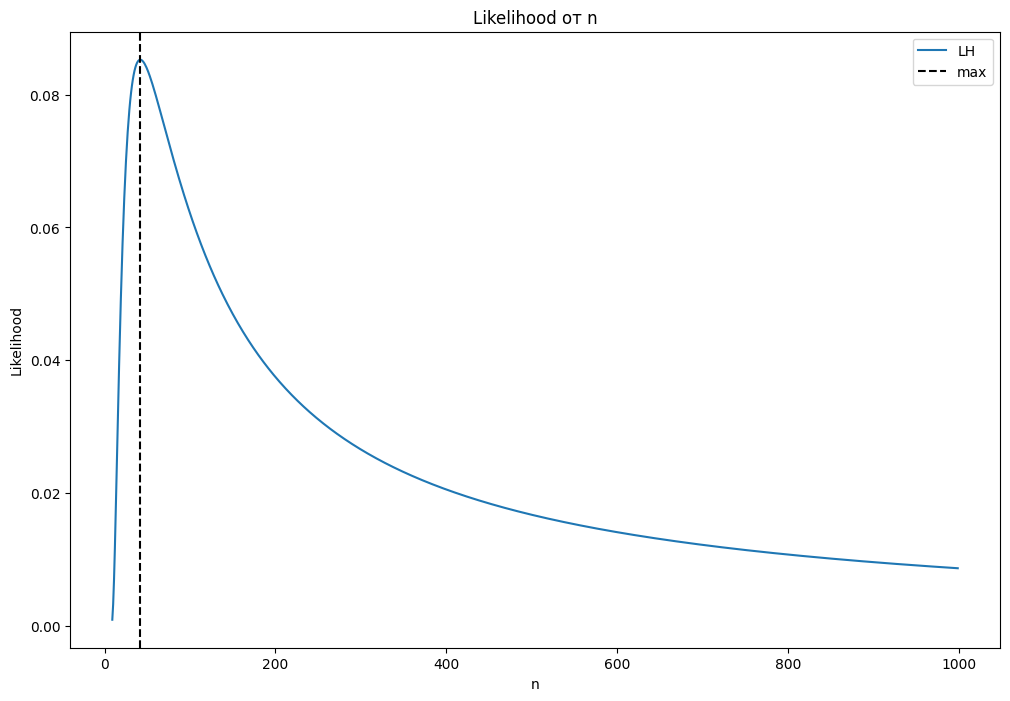

In [2]:
def LH(n):
    start = 1
    for x in range(2, 11):
        start *= (n - x + 2) / n
    return start * (9 / n)

l = np.array([LH(n) for n in range(9, 1000)])
X = np.arange(9, 1000)
plt.figure(figsize=(12, 8))
plt.xlabel('n')
plt.ylabel('Likelihood')
plt.title('Likelihood от n')
plt.plot(np.arange(9, 1000), l, label='LH')
maximum = X[l.argmax()]
plt.axvline(maximum, linestyle='dashed', color='black', label='max')
plt.legend()
print('Max:', maximum)
plt.show()


**Пункт Б**

Постройте график математического ожидания номера заказа, на котором происходит первый повторный приезда, как функции от общего количества такси n. Найдите оценку числа n методом моментов.

---
__prob(k,n)__ - функция, которая подсчитывает вероятность для заданных k и n

__mu(n)__ - функция, которая считает мат.ожидание, перемножая k и вероятность $P(X=k)$

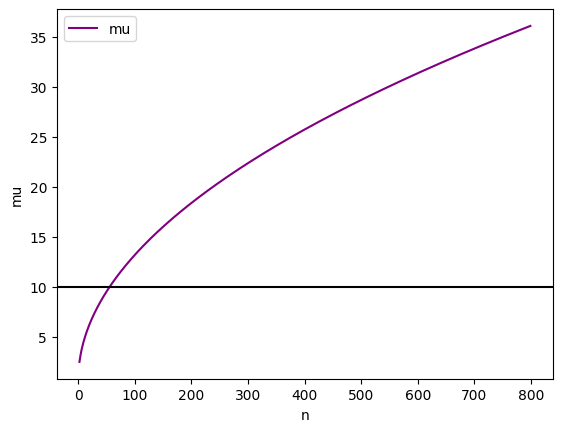

In [3]:
from math import factorial,sqrt
def prob(k, n):
    init = 1
    for i in range(2,k+1):
        init *= (n-i+2)/n
    return (init)*(k-1)/(n)
def mu(n):
    return sum(k*prob(k,n) for k in range(2,n+2))
gen = np.arange(2, 800)
E = [mu(n) for n in gen]
plt.plot(gen,E, color = 'purple',label='mu');
plt.xlabel('n')
plt.ylabel('mu')
plt.legend();
plt.axhline(10,color='black');

**Пункт В**

Предположим, что настоящее n равно 100. Проведя 10000 симуляций вызовов такси до первого повторного, рассчитайте 10000 оценок методом моментов и 10000 оценок ме- тодом максимального правдоподобия. Постройте гистограммы для оценок двух методов. Оцените смещение, дисперсию и среднеквадратичную ошибку двух методов.


---
Имитация эксперимента

In [4]:
tax = np.arange(1, 101)
ans = list()
for _ in range(1,10**4+1):
    choice = np.random.choice(tax)
    a = list()
    while True:
        if np.isin(choice,a) == True:
            break
        a.append(choice)
        choice = np.random.choice(tax)
    ans.append(len(a)+1)

---
Считаем ML оценку для каждого эксперимента

In [5]:
from warnings import filterwarnings
filterwarnings('ignore')
ML = list()
for k in (ans):
    n = np.arange(k-1, 1500)
    j = np.array([prob(k, i) for i in n])
    ML.append(n[j.argmax()])

In [6]:
MM = list()
E = [mu(i) for i in gen]
n = np.arange(2,801)
for k in ans:
    j = n[abs(np.array(E)-k).argmin()]
    MM.append(j)

Text(0, 0.5, 'mu')

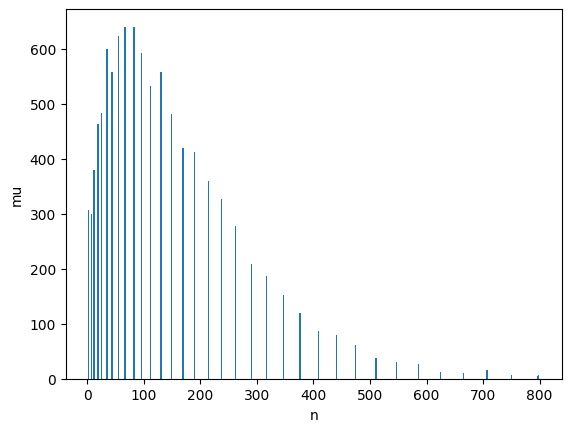

In [7]:
plt.hist(MM,bins=350);
plt.xlabel('n')
plt.ylabel('mu')

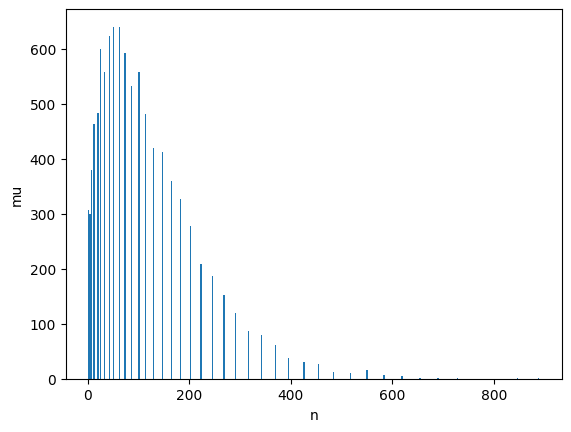

In [8]:
plt.hist(ML,bins=350);
plt.xlabel('n')
plt.ylabel('mu');

In [9]:
from sklearn.metrics import mean_squared_error
ML = np.array(ML)
MM = np.array(MM)
biasML = abs(100-np.mean(ML))
biasMM = abs(100-np.mean(MM))
mseML = mean_squared_error(ML,np.array([[100 for _ in range(ML.shape[0])]])[0])
mseMM = mean_squared_error(MM,np.array([[100 for _ in range(MM.shape[0])]])[0])
varML = ML.var()
varMM = MM.var()
print('Bias: ', (biasML,biasMM))
print('MSE: ', (mseML,mseMM))
print('Var', (varML,varMM))

Bias:  (3.8237000000000023, 25.3519)
MSE:  (8634.6731, 14750.4977)
Var (8620.05241831, 14107.778866390001)


### <center>Задача №2</center>



__Условие__:

Однажды в Самарканде турист заказывал Яндекс-такси.На десятом заказе он обнаружил,что у таксистов было 6 разных имён. Для упрощения предположим, что все n имён среди таксистов встречаются равновероятно и независимо от поездки к поездке.

__Решение__

__Пункт а__

Постройте график функции правдоподобия как функции от общего количества имён n. Найдите оценку числа n методом максимального правдоподобия.

---
LH(n,k=6) - функция правдоподобия для данной задачи. Считается, так же и в прошлой задаче, но еще домножается на сочетания с повторениями и делится на $n^{10-k}$

In [10]:
from itertools import combinations_with_replacement
def LH(n,k=6):
    combinations = np.sum(np.prod(
        np.array(list(
            combinations_with_replacement(np.arange(1, k+1), 10-k)
        )
                ),
        axis=1)
                         )
    return np.prod([(n-x)/n  for x in range(1,k)])*combinations/n**(10-k)

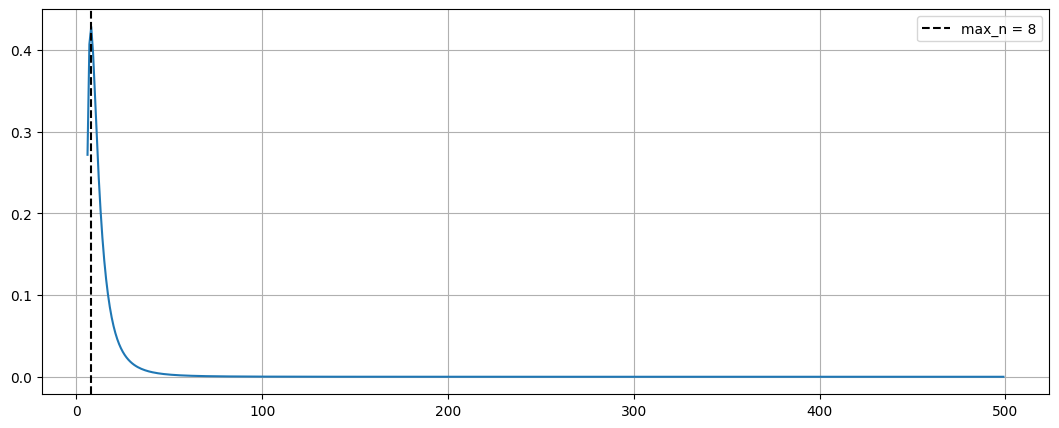

 ML-оценка: 8


In [11]:
plt.figure(figsize=(13, 5))

x = np.arange(6, 500)
l = [LH(n) for n in range(6,500)]

plt.plot(x, l)
plt.grid()
max_n = x[np.argmax(l)]
plt.axvline(max_n, linestyle='dashed', color='black', label='max_n = 8')
plt.legend()
plt.show()
print(f' ML-оценка: {max_n}')

**Пункт б**

Постройте график математического ожидания числа разных имён у 10 таксистов, как функции от общего количества имён n. Найдите оценку числа n методом моментов.

---
E2b(n) - функция подсчета мат.ожидания

In [12]:
def E2b(n):
    return sum([k*LH(n,k) for k in range(1,11)])

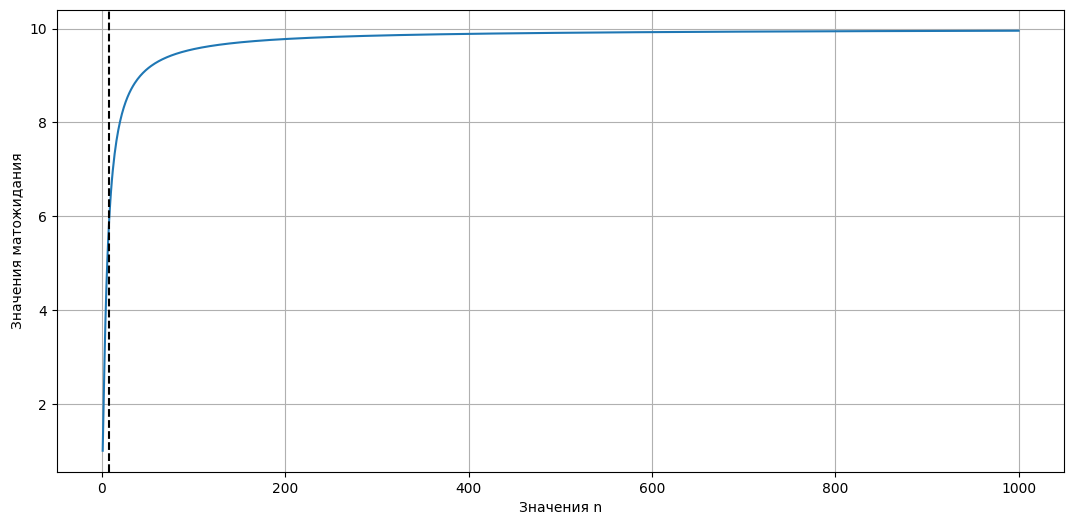

Оценка общего числа таксистов при помощи MM: 8.


In [13]:
plt.figure(figsize=(13, 6))
n = np.arange(1, 1001)
E = np.array([E2b(i) for i in range(1, 1001)])

plt.plot(np.arange(1, 1001), E)
plt.grid()
min_n = n[np.argmin(np.abs(E - 6))]
plt.axvline(min_n, linestyle='dashed', color='black', label='n=8')
plt.xlabel('Значения n')
plt.ylabel('Значения матожидания')
plt.show()

print(f'Оценка общего числа таксистов при помощи MM: {min_n}.')

**Пункт в**

Предположим, что настоящее n равно 20. Проведя 10000 симуляций десяти вызовов такси, рассчитайте 10000 оценок методом моментов и 10000 оценок методом максимально- го правдоподобия. Постройте гистограммы для оценок двух методов. Оцените смещение, дисперсию и среднеквадратичную ошибку двух методов.

---
g(n,m) - функция генерации эксперимента

In [14]:
def g(n, m):
    return np.unique(np.random.choice(np.arange(1, n+1), size = m)).shape[0]
generated = [g(20, 10) for _ in range(10**4)]
ML = list()
for k in generated:
    n_general = np.arange(k, 300)
    obs = np.array([LH(n,k) for n in range(k, 300)])
    ML.append(n_general[obs.argmax()] if n_general[obs.argmax()]<100 else 100)

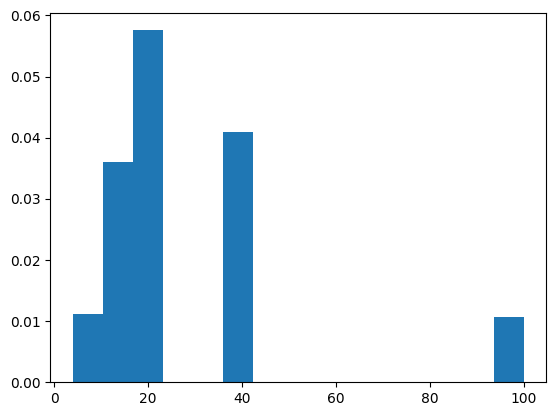

In [15]:
plt.hist(ML,density=True,bins=15);

In [17]:
MM = list()
n = np.arange(1,1001)
for k in generated:
    obs = n[(abs(E-k).argmin())]
    MM.append(obs if obs<100 else 100)

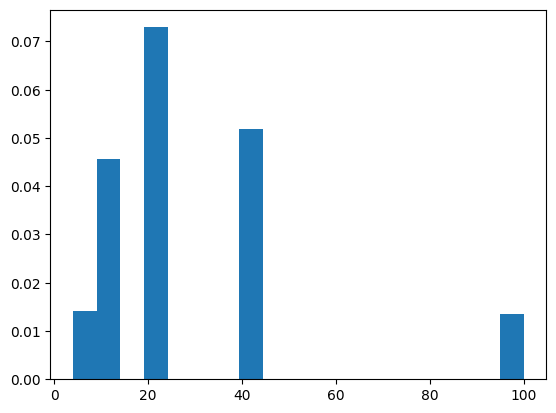

In [18]:
plt.hist(MM,bins=19,density=True);

In [19]:
from sklearn.metrics import mean_squared_error
ML = np.array(ML)
MM = np.array(MM)
biasML = abs(20-np.mean(ML))
biasMM = abs(20-np.mean(MM))
mseML = mean_squared_error(ML,np.array([[20 for _ in range(ML.shape[0])]])[0])
mseMM = mean_squared_error(MM,np.array([[20 for _ in range(MM.shape[0])]])[0])
varML = ML.var()
varMM = MM.var()
print('Bias: ', (biasML,biasMM))
print('MSE: ', (mseML,mseMM))
print('Var', (varML,varMM))


Bias:  (8.111799999999999, 8.4876)
MSE:  (587.977, 587.3968)
Var (522.17570076, 515.35744624)


### <center>Задача №3</center>

**Условие**

Иноагент Иннокентий по 20 наблюдениям строит 95%-й доверительный интервал для мате- матического ожидания несколькими способами: классический асимптотический нормальный интервал, с помощью наивного бутстрэпа, с помощью бутстрэпа t-статистики.

**Пункт а**

Для каждого способа с помощью 10000 симуляций оцените вероятность того, что номинально 95%-й доверительный интервал фактически накрывает математическое ожидание, если наблюдения распределены экспоненциально с интенсивностью 1.

---

In [20]:
n = 20  
alpha = 0.95  
samples = np.random.exponential(scale=1, size=(10000, n))
true_mean = 1
mean = np.mean(samples, axis=1)
std = np.std(samples, axis=1, ddof=1)
z_critical = 1.96
ci_classic = (mean - z_critical * std / np.sqrt(n),
              mean + z_critical * std / np.sqrt(n))
np.mean((ci_classic[0] <= true_mean) & (true_mean <= ci_classic[1]))

0.9067

In [21]:
boot_lst = list()
for sample in samples:
    bootstrap_means = np.mean(sample[np.random.choice(np.arange(20), size=(10**4,20))],axis=1)
    ci_bootstrap = np.percentile(bootstrap_means, [2.5,97.5], axis=0)
    coverage_bootstrap = np.mean((ci_bootstrap[0] <= true_mean) & (true_mean <= ci_bootstrap[1]))
    boot_lst.append(coverage_bootstrap)
np.mean(boot_lst)

0.9063

In [22]:
boot_t_lst = list()
for sample in samples:

    index = np.random.choice(np.arange(20), size=(10**4, 20))

    means_boot = np.mean(sample[index], axis=1)
    se_boot = (np.std(sample[index], axis=1, ddof = 1))/np.sqrt(20)
    mean_sample = np.mean(sample)

    ci_bootstrap_t = np.percentile((means_boot - mean_sample)/se_boot, [2.5,97.5],axis=0)
    coverage_bootstrap_t = np.mean((mean_sample - ci_bootstrap_t[1]*(np.std(sample, ddof = 1))/np.sqrt(20) <= true_mean) & (true_mean <= mean_sample - ci_bootstrap_t[0]*(np.std(sample, ddof = 1))/np.sqrt(20)))
    boot_t_lst.append(coverage_bootstrap_t)

In [23]:
np.mean(boot_t_lst)

0.948

**Пункт Б**

Пересчитайте вероятности накрытия,если наблюдения имеют распределение Стьюдента с тремя степенями свободы.

---

In [24]:
t_samples = np.random.standard_t(3, size=(10**4,20))
true_mean = 0

In [25]:
true_mean = 0
mean = np.mean(t_samples, axis=1)
std = np.std(t_samples, axis=1, ddof=1)
z_critical = 1.96
ci_classic = (mean - z_critical * std / np.sqrt(n),
              mean + z_critical * std / np.sqrt(n))
np.mean((ci_classic[0] <= true_mean) & (true_mean <= ci_classic[1]))

0.9405

In [26]:
boot_lst = list()
for sample in t_samples:
    bootstrap_means = np.mean(sample[np.random.choice(np.arange(20), size=(10**4,20))],axis=1)
    ci_bootstrap = np.percentile(bootstrap_means, [2.5,97.5], axis=0)
    coverage_bootstrap = np.mean((ci_bootstrap[0] <= true_mean) & (true_mean <= ci_bootstrap[1]))
    boot_lst.append(coverage_bootstrap)
np.mean(boot_lst)

0.9194

In [27]:
boot_t_lst = list()
for sample in t_samples:

    index = np.random.choice(np.arange(20), size=(10**4, 20))

    means_boot = np.mean(sample[index], axis=1)
    se_boot = (np.std(sample[index], axis=1, ddof = 1))/np.sqrt(20)
    mean_sample = np.mean(sample)

    ci_bootstrap_t = np.percentile((means_boot - mean_sample)/se_boot, [2.5,97.5],axis=0)
    coverage_bootstrap_t = np.mean((mean_sample - ci_bootstrap_t[1]*(np.std(sample, ddof = 1))/np.sqrt(20) <= true_mean) & (true_mean <= mean_sample - ci_bootstrap_t[0]*(np.std(sample, ddof = 1))/np.sqrt(20)))
    boot_t_lst.append(coverage_bootstrap_t)

In [28]:
np.mean(boot_t_lst)

0.9266

### <center>Задача №4</center>

In [29]:
df = pd.read_csv('/Users/stevenstrange/Downloads/marks.csv', sep = ';')
p1 = r'^[бвгджзйклмнпрстфхцчшщ]'
p2 = r'^[аеёиоуыэюя]'

samplecons = df[df['Фамилия'].str.contains(p1, flags=re.IGNORECASE, regex=True)]
samplevow = df[df['Фамилия'].str.contains(p2, flags=re.IGNORECASE, regex=True)]



In [30]:
x = np.array(samplecons['Результат'])
y = np.array(samplevow['Результат'])


**Пункт а**

Используйте тест Уэлча.

---

In [31]:
statistic, p = ttest_ind(x, y, equal_var=False, alternative='two-sided')
if p < 0.05:
    print('Гипотеза отвергается')
else:
    print('Гипотеза не отвергается')

Гипотеза не отвергается


**Пункт б**

Используйте наивный бутстрэп.

---

In [32]:
mreal = np.mean(x) - np.mean(y)
stdreal = np.sqrt((x.var())/x.shape[0] + (y.var())/y.shape[0])

In [33]:
boot_diff = np.mean(x[
    np.random.choice(np.arange(283), size=(10**4, x.shape[0]))
], axis=1) - np.mean(y[np.random.choice(np.arange(y.shape[0]), size=(10**4, y.shape[0]))], axis=1)

quantiles = np.percentile(boot_diff, [2.5,97.5], axis=0)
coverage = (quantiles[0] <= mreal) & (mreal <= quantiles[1])
p_value = 2*(np.min([np.mean((mreal < boot_diff)), np.mean(mreal >= boot_diff)]))
print(f'Накрытие: {coverage}.') 
if coverage:
    print('Гипотеза не отвергается')
else:
    print('Гипотеза отвергается')
print('P value: ', p_value)

Накрытие: True.
Гипотеза не отвергается
P value:  0.9986


**Пункт в**

Используйте бутстрэп t-статистики

---

In [34]:
x_boot = np.random.choice(np.arange(x.shape[0]), size=(10**4, x.shape[0]))
y_boot = np.random.choice(np.arange(y.shape[0]), size=(10**4, y.shape[0]))
boot_diff = np.mean(x[x_boot], axis=1) - np.mean(y[y_boot], axis=1)
boot_std = np.sqrt(((np.std(x[x_boot], axis=1, ddof=1))**2 /(x.shape[0]) + np.std(y[y_boot], axis=1, ddof=1))**2 /(y.shape[0]))
sample = (boot_diff-mreal)/boot_std
quantiles = np.percentile(boot_diff, [2.5,97.5], axis=0)
coverage = (quantiles[0] <= statistic) & (statistic <= quantiles[1])
p_value = 2*(np.min([np.mean((statistic < sample)), np.mean(statistic >= sample)]))
print(f'Накрытие: {coverage}.') 
if coverage:
    print('Гипотеза не отвергается')
else:
    print('Гипотеза отвергается')
print('P value: ', p_value)

Накрытие: True.
Гипотеза не отвергается
P value:  0.3984


**Пункт г**

 Используйте перестановочный тест

---

In [35]:
a = np.hstack((np.zeros(y.shape), np.ones(x.shape)))
w = np.hstack((x, y))
lst = list()

for i in range(10**4):
    perm = np.random.permutation(a)
    lst.append(np.mean(w[perm == 1]) - np.mean(w[perm == 0]))
quantiles = np.percentile(lst, [2.5,97.5], axis=0)
lst = np.array(lst)
coverage = (quantiles[0] <= mreal) & (mreal <= quantiles[1])
p_value = 2*(np.min([np.mean((lst <= mreal)), np.mean(mreal < lst)]))
print(f'Накрытие: {coverage}.') 
if coverage:
    print('Гипотеза не отвергается')
else:
    print('Гипотеза отвергается')
print('P value: ', p_value)

Накрытие: True.
Гипотеза не отвергается
P value:  0.3834


### <center>Задача №5</center>

In [36]:
medcon1 = df[(df['Фамилия'].str.contains(p1, case=False, regex=True)) & 
                       (df['Результат'] > np.median(df['Результат']))].count()

medcon2 = df[(df['Фамилия'].str.contains(p1, case=False, regex=True)) & 
                       (df['Результат'] <= np.median(df['Результат']))].count()

medvow1 = df[(df['Фамилия'].str.contains(p2, case=False, regex=True)) & 
                       (df['Результат'] > np.median(df['Результат']))].count()

medvow2 = df[(df['Фамилия'].str.contains(p2, case=False, regex=True)) & 
                       (df['Результат'] <= np.median(df['Результат']))].count()

In [37]:
matrix = pd.DataFrame(np.matrix([[medcon1[0], medcon2[0]], [medvow1[0], medvow2[0]]]))
matrix = matrix.rename(columns={0:'Больше медианы',1:'Меньше медианы'},index={0:'Согласные', 1:'Гласные'})
matrix

,Больше медианы,Меньше медианы
Согласные,145,138
Гласные,21,28


**Пункт а**

Постройте 95% асимптотический интервал для отношения шансов хорошо написать экзамен(«несогласных» к «согласным»). Проверьте гипотезу о том, что отношение шансов равно 1 и укажите P-значение.

---

In [38]:
rv = norm(loc = 0, scale = 1)
stat = np.log(21/28) - np.log(145/138) 
std = np.sqrt(1/145+1/138+1/21+1/28)

stat_obs = (stat - 0)/(std) 

print(f' CI: {np.exp([stat - 1.96*std, stat + 1.96*std])} \n p_value: {2*np.min([rv.cdf(stat_obs), 1-rv.cdf(stat_obs)])}')

 CI: [0.38709024 1.31623208] 
 p_value: 0.280180274566451


**Пункт б**


Постройте 95% асимптотический интервал для отношения вероятностей хорошо написать экзамен. Проверьте гипотезу о том, что отношение вероятностей равно 1 и укажите P-значение.

---

In [39]:
stat = np.log(21/49) - np.log(145/283)
std = np.sqrt(1/145 - 1/283 + 1/21 - 1/49)

stat_obs = (stat - 0)/(std)

print(f' CI: {np.exp([stat - 1.96*std, stat + 1.96*std])} ')
print(f' p-value: {2*np.min([rv.cdf(stat_obs), 1-rv.cdf(stat_obs)])}')

 CI: [0.59374922 1.17836612] 
 p-value: 0.3070947928050546


**Пункт в**

Постройте 95% интервал для отношения шансов хорошо написать экзамен с помощью наивного бутстрэпа. Проверьте гипотезу о том, что отношение шансов равно 1 и укажите P-значение.

---

In [40]:
import numpy as np

np.random.seed(19)

odds = list()

cons = 145 / (145+138)
vow = 21 / (21+28)

OR_obs = (cons / (1 - cons)) / (vow / (1 - vow))
OR_obs
for _ in range(10**4):
    cons = np.random.choice(samplecons['Результат'], size=samplecons.shape[0])
    vow = np.random.choice(samplevow['Результат'], size=samplevow.shape[0])

    medcons1 = np.sum(cons > np.median(df['Результат']))
    medcons2 = np.sum(cons <= np.median(df['Результат']))
    medvow1 = np.sum(vow > np.median(df['Результат']))
    medvow2 = np.sum(vow <= np.median(df['Результат']))

    matrix = np.array([[medcons1, medcons2], [medvow1, medvow2]])

    p_a = matrix[0][0] / np.sum(matrix[0])
    p_b = matrix[1][0] / np.sum(matrix[1])
    odds.append((p_a / (1 - p_a)) / (p_b / (1 - p_b)))

odds = np.array(odds)
quantiles = np.percentile(odds, [2.5,97.5], axis=0)

coverage = (quantiles[0] <= OR_obs <= quantiles[1])
p_value = 2 * (np.min([np.mean(OR_obs < odds), np.mean(OR_obs >= odds)]))

print(f'Накрывает ли построенный интервал наблюдаемое значение: {coverage}')
print('Вывод: гипотеза не отвергается.')
if p_value < 0.05:
    print('Гипотеза отвергается')
else:
    print('Гипотеза не отвергается')

Накрывает ли построенный интервал наблюдаемое значение: True
Вывод: гипотеза не отвергается.
Гипотеза не отвергается


### <center>Задача №6</center>


**Пункт а**

Оцените β методом моментов. Рассчитайте выборочную корреляцию

---

In [41]:
sample2 = df.copy()

In [42]:
sample2['Фамилия'] = sample2['Фамилия'].apply(len)
beta = sample2['Результат'].mean()/sample2['Фамилия'].mean()
s = np.corrcoef(sample2['Фамилия'], sample2['Результат'])[0][1]

In [43]:
beta

2.0613026819923372

**Пункт б**

С помощью перестановочного теста найдите P-значение и формально протестируйте
гипотезу о том, что корреляция равна нулю

---

In [44]:
corr_perest = list()
for i in range(10**4):
    x1=np.random.choice(sample2['Результат'],size=sample2.shape[0])
    corr_perest.append(np.corrcoef(x1,sample2['Фамилия'])[0][1])

In [45]:
corr_perest = np.array(corr_perest)
quantiles = np.percentile(corr_perest, [2.5,97.5], axis=0)
coverage = (quantiles[0] <= 0) & (0 <= quantiles[1])
p_value = 2 * (np.min([np.mean(s < corr_perest), np.mean(s >= corr_perest)]))
print(f'Накрывает ли построенный интервал наблюдаемое значение: {coverage}')
if p_value < 0.05:
    print('Гипотеза отвергается')
else:
    print('Гипотеза не отвергается')

Накрывает ли построенный интервал наблюдаемое значение: True
Гипотеза не отвергается


### <center>Задача №8</center>

1. Лекции и семинары ШАД по АБ тестам
2. [Курс теории вероятностей ФКН пилотного потока](http://wiki.cs.hse.ru/Теория_вероятностей_и_математическая_статистика_2021/2022_(пилотный_поток))
3. [3Blue1Brown](https://www.youtube.com/@3blue1brown)